<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/Exercise_2.8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.8

Name: JM

Date: December 2020 

A gas surge drum has two components (hydrogen and methane) in the feedstream. Let $y_{in}$ and $y$ represent the mole fraction of methane in the feedstream and drum, respectively. Find $dP/dt$ and $dy/dt$ if the inlet and outlet flowrates can vary. Also asume that the inlet concentration can vary. Assume the ideal gas law for the effect of pressure and composition on density. 

### Accumulation of gas 

$$\frac{dN}{dt} = q_{in} - q$$

$$\frac{d(PV/RT)}{dt} = q_{in} - q$$

$$\frac{V}{RT} \frac{dP}{dt} = q_{in} - q$$

$$ \frac{dP}{dt} = \frac{RT}{V}(q_{in} - q)$$

### Accumulation of methane

$$\frac{d(Ny)}{dt} = q_{in}y_{in} - qy$$

$$\frac{d((PV/RT)y)}{dt} = q_{in}y_{in} - qy$$

$$\frac{V}{RT} (y\frac{dP}{dt} + P\frac{dy}{dt}) = q_{in}y_{in} - qy$$

$$y \frac{RT}{V}(q_{in} - q) + P \frac{dy}{dt} = \frac{RT}{V}q_{in}y_{in} - \frac{RT}{V}q y$$

$$\frac{dy}{dt} = \frac{RT}{PV}q_{in}(y_{in} - y)$$

In [52]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [53]:
# establish model 
def model(s,t,p,u):

  # state variables
  V = s[0]
  P = s[1]
  y = s[2]

  # parameters
  T = p[0]
  R = p[1]
  
  # inputs
  qin = u[0]
  q = u[1]
  yin = u[2]

  # material balance
  dVdt = qin - q
  # molar balance
  dPdt = R*T/V*(qin-q)
  # methane balance
  dydt = R*T/(P*V)*(yin-y)

  return [dVdt,dPdt,dydt]

In [208]:
# establish parameters
T = 298.0 # K
R = 0.0821 # atm*L/(K*mol)
p = [T, R]

In [209]:
# establish initial conditions
V0 = 200 # L
P0 = 7 # atm
y0 = 0.1 
s = [V0,P0,y0]

In [210]:
# establish integration time 
t = np.linspace(0,100,1000)

In [211]:
# establish inputs
qin = 0.01 # mol/min
q = 0.005 # mol/min
yin = 0.5
u = [qin, q, yin]

In [212]:
out = odeint(model,s,t,args=(p,u))

In [213]:
# save results
V = out[:,0]
P = out[:,1]
y = out[:,2]

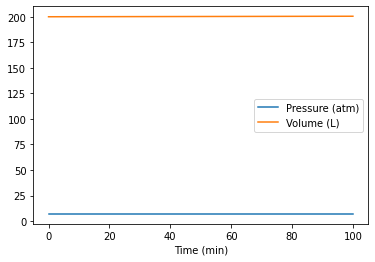

In [214]:
# show results
plt.plot(t,P, label = "Pressure (atm)")
plt.plot(t,V, label = "Volume (L)")
plt.xlabel("Time (min)")
plt.legend(loc = "best")

Text(0, 0.5, 'Methane composition')

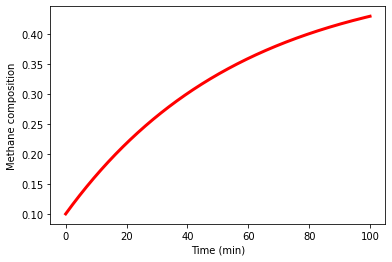

In [215]:
plt.plot(t,y,"r-", linewidth = 3)
plt.xlabel("Time (min)")
plt.ylabel("Methane composition")

Let's vary the inputs 

In [216]:
# establish parameters
T = 298.0 # K
R = 0.0821 # atm*L/(K*mol)
p = [T, R]

In [217]:
# establish initial conditions
V0 = 200 # L
P0 = 7 # atm
y0 = 0.1 
s = [V0,P0,y0]

In [218]:
# establish inputs
qin = 0.01 # mol/min
q = 0.005 # mol/min
yin = 0.5
u = [qin, q, yin]

In [219]:
# change inputs 
qin = np.ones(len(t))*qin
qin[500:750] = 0.02
q = np.ones(len(t))*q
yin = np.ones(len(t))*yin
yin[400:600] = 0

In [220]:
# vectors to save state
V = np.ones(len(t))*V0
P = np.ones(len(t))*P0
y = np.ones(len(t))*y0

In [221]:
for i in range(len(t)-1):
  #update time span
  ts = [t[i],t[i+1]]
  # change inputs
  u = [qin[i+1],q[i+1],yin[i+1]]
  # solve ODEs
  out = odeint(model,s,ts,args=(p,u,))
  # save sate
  V[i+1] = out[-1][0] 
  P[i+1] = out[-1][1]
  y[i+1] = out[-1][2]
  # update initial conditions 
  s = out[-1]

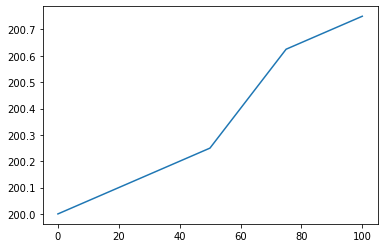

In [222]:
plt.plot(t,V)

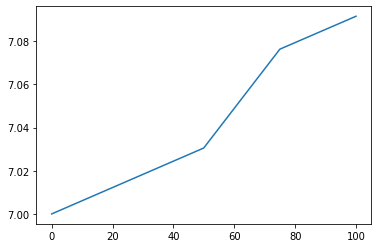

In [223]:
plt.plot(t,P)

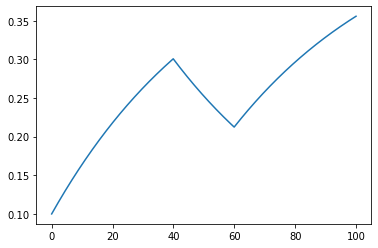

In [224]:
plt.plot(t,y)